In [1]:
import os

import numpy as np
import pandas as pd
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import experiment

In [5]:
runs = experiment.get_all_expe()
runs

['1613070986#EXPE1']

In [7]:
run = runs[0]
df = experiment.get_expe_results(run)
df.head()

,pool,dataset,k_init,k_refinement,max_epochs,n_sampling,competitor,f1-score,n_replication
0,Basic,half-moons,0,0,0,20000,P2G-xgb,0.914193,0
1,Basic,half-moons,0,0,1,20000,P2G-xgb,0.914193,0
2,Basic,half-moons,0,1,0,20000,P2G-xgb,0.914193,0
3,Basic,half-moons,0,1,1,20000,P2G-xgb,0.914193,0
4,Basic,half-moons,1,0,0,20000,P2G-xgb,0.914193,0


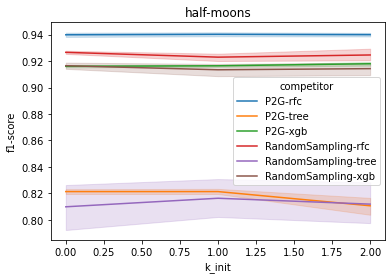

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

for d in df.dataset.unique():

    tmp = df[df.dataset==d][df.pool=="Basic"]

    tmp = tmp.groupby(['pool','dataset','k_init','k_refinement','max_epochs','n_sampling','n_replication','competitor']).mean()
    tmp = tmp.reset_index()
    
    plt.figure()
    ax = sns.lineplot(x="k_init", y="f1-score", hue="competitor", data=tmp)
    ax.set_title(d)